**Question 1**

**a. True**  
A decision tree can be fully grown so that every leaf node represents a pure class (entropy = 0), but this often leads to overfitting and poor generalization to unseen data.

**b. False**  
ID3 uses a greedy approach based on information gain, which does not guarantee the globally optimal decision tree; it may get stuck in local optima.

**c. False**  
Selecting features that provide no discrimination about the class would remove valuable information, making the model unable to learn meaningful patterns.

**d. False**  
Stopping only when all instances are correctly classified leads to overfitting. Instead, techniques like pruning or early stopping are used to improve generalization.

**e. False**  
Converting a tree to rules and then pruning/deleting some rules can produce models that cannot be represented by any pruned version of the original tree, as rule pruning offers different flexibility than tree pruning.

&nbsp;

**Question 2**

#### **(a) Drawing Decision Boundaries**
The given decision tree partitions the 2D plane (f1, f2) into regions based on conditions in the tree. Below are the regions based on the given decision rules:

1. **f1 < 25 (left subtree)**  
   - **f2 < 15 (left subtree of f1 < 25)**
     - **f1 < 10 → A** (bottom-left region: f1 < 10, f2 < 15)
     - **f1 ≥ 10 → B** (bottom-mid region: 10 ≤ f1 < 25, f2 < 15)
   - **f2 ≥ 15**
     - **f1 < 5 → C** (top-left region: f1 < 5, f2 ≥ 15)
     - **f1 ≥ 5 → D** (top-mid region: 5 ≤ f1 < 25, f2 ≥ 15)

2. **f1 ≥ 25 (right subtree)**
   - **f2 < 15 → E** (bottom-right region: f1 ≥ 25, f2 < 15)
   - **f2 ≥ 15 → F** (top-right region: f1 ≥ 25, f2 ≥ 15)

To visualize the decision boundaries:
- Draw a vertical line at **f1 = 25** to separate left and right subtrees.
- Draw a horizontal line at **f2 = 15** within both subtrees.
- Draw vertical lines at **f1 = 10** (for f2 < 15) and **f1 = 5** (for f2 ≥ 15) to separate further subdivisions.

Each region in the plane corresponds to a class (A, B, C, D, E, F).

---

#### **(b) Syntactically Different Decision Tree**
A different tree structure that defines the same decision boundaries but has a different order of decisions could be:

1. **f2 < 15**
   - **f1 < 10 → A**
   - **10 ≤ f1 < 25 → B**
   - **f1 ≥ 25 → E**
2. **f2 ≥ 15**
   - **f1 < 5 → C**
   - **5 ≤ f1 < 25 → D**
   - **f1 ≥ 25 → F**

This tree maintains the same decision boundaries but changes the order of splits, making it syntactically different while preserving identical classification regions.


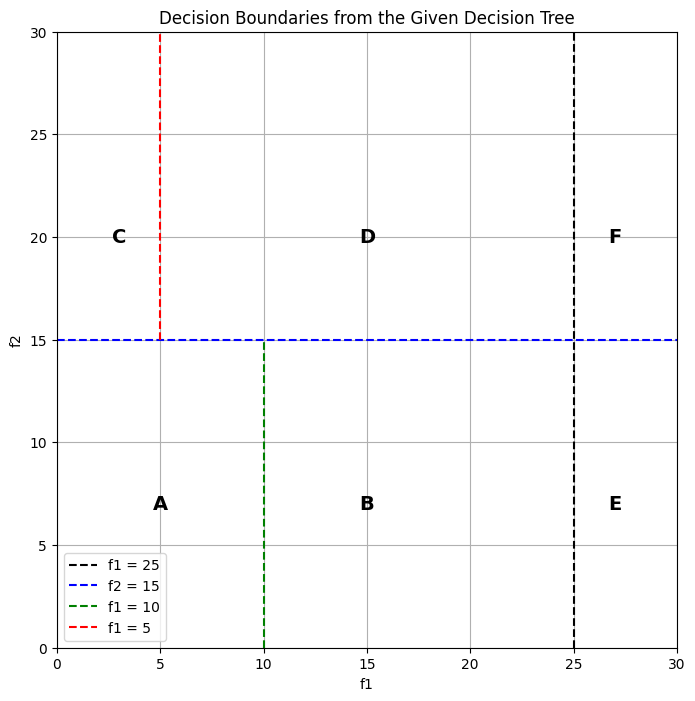

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define decision boundaries
f1_vals = np.linspace(0, 30, 300)
f2_vals = np.linspace(0, 30, 300)

# Create meshgrid
F1, F2 = np.meshgrid(f1_vals, f2_vals)
Z = np.full(F1.shape, '', dtype='<U1')

# Assign class labels based on decision rules
Z[(F1 < 25) & (F2 < 15) & (F1 < 10)] = 'A'
Z[(F1 < 25) & (F2 < 15) & (F1 >= 10)] = 'B'
Z[(F1 < 25) & (F2 >= 15) & (F1 < 5)] = 'C'
Z[(F1 < 25) & (F2 >= 15) & (F1 >= 5)] = 'D'
Z[(F1 >= 25) & (F2 < 15)] = 'E'
Z[(F1 >= 25) & (F2 >= 15)] = 'F'

# Plot decision boundaries
plt.figure(figsize=(8, 8))
plt.axvline(x=25, color='black', linestyle='--', label="f1 = 25")
plt.axhline(y=15, color='blue', linestyle='--', label="f2 = 15")
plt.axvline(x=10, ymin=0, ymax=0.5, color='green', linestyle='--', label="f1 = 10")
plt.axvline(x=5, ymin=0.5, ymax=1, color='red', linestyle='--', label="f1 = 5")

# Label each region
regions = {'A': (5, 7), 'B': (15, 7), 'C': (3, 20), 'D': (15, 20), 'E': (27, 7), 'F': (27, 20)}
for label, (x, y) in regions.items():
    plt.text(x, y, label, fontsize=14, fontweight='bold', ha='center', va='center')

# Formatting the plot
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Decision Boundaries from the Given Decision Tree")
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.legend()
plt.grid(True)
plt.show()


&nbsp;

**Question 3**

I'll solve this two-category classification problem by constructing a decision tree using information gain as the splitting criterion.

## Calculating the Root Condition (First Split)

First, I need to calculate the entropy of the dataset:
- Total instances: 8
- Class c₁: 4 instances
- Class c₂: 4 instances

### Initial Entropy
Entropy(S) = -P(c₁)log₂P(c₁) - P(c₂)log₂P(c₂)
Entropy(S) = -(4/8)log₂(4/8) - (4/8)log₂(4/8)
Entropy(S) = -(0.5)log₂(0.5) - (0.5)log₂(0.5)
Entropy(S) = -(0.5)(-1) - (0.5)(-1)
Entropy(S) = 0.5 + 0.5 = 1

### Information Gain for Each Feature

#### Feature f1 (values: a, b)
- For f1 = a: 4 instances (2 c₁, 2 c₂)
  - Entropy(S_a) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = -(0.5)(-1) - (0.5)(-1) = 1
- For f1 = b: 4 instances (2 c₁, 2 c₂)
  - Entropy(S_b) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = -(0.5)(-1) - (0.5)(-1) = 1

Information Gain(S, f1) = Entropy(S) - [(4/8) × Entropy(S_a) + (4/8) × Entropy(S_b)]
Information Gain(S, f1) = 1 - [(0.5 × 1) + (0.5 × 1)]
Information Gain(S, f1) = 1 - 1 = 0

#### Feature f2 (values: 0, 1)
- For f2 = 0: 4 instances (2 c₁, 2 c₂)
  - Entropy(S_0) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = 1
- For f2 = 1: 4 instances (2 c₁, 2 c₂)
  - Entropy(S_1) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = 1

Information Gain(S, f2) = 1 - [(0.5 × 1) + (0.5 × 1)] = 0

#### Feature f3 (values: a, c)
- For f3 = a: 2 instances (0 c₁, 2 c₂)
  - Entropy(S_a) = -(0/2)log₂(0/2) - (2/2)log₂(2/2) = 0
- For f3 = c: 6 instances (4 c₁, 2 c₂)
  - Entropy(S_c) = -(4/6)log₂(4/6) - (2/6)log₂(2/6) = -(2/3)log₂(2/3) - (1/3)log₂(1/3) ≈ 0.918

Information Gain(S, f3) = 1 - [(2/8 × 0) + (6/8 × 0.918)]
Information Gain(S, f3) = 1 - 0.689 = 0.311

#### Feature f4 (values: -1, 1)
- For f4 = -1: 4 instances (2 c₁, 2 c₂)
  - Entropy(S_-1) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = 1
- For f4 = 1: 4 instances (2 c₁, 2 c₂)
  - Entropy(S_1) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = 1

Information Gain(S, f4) = 1 - [(0.5 × 1) + (0.5 × 1)] = 0

### First Split Decision
The feature with the highest information gain is f3 (0.311), so we'll use it as the root node.

## Complete Decision Tree

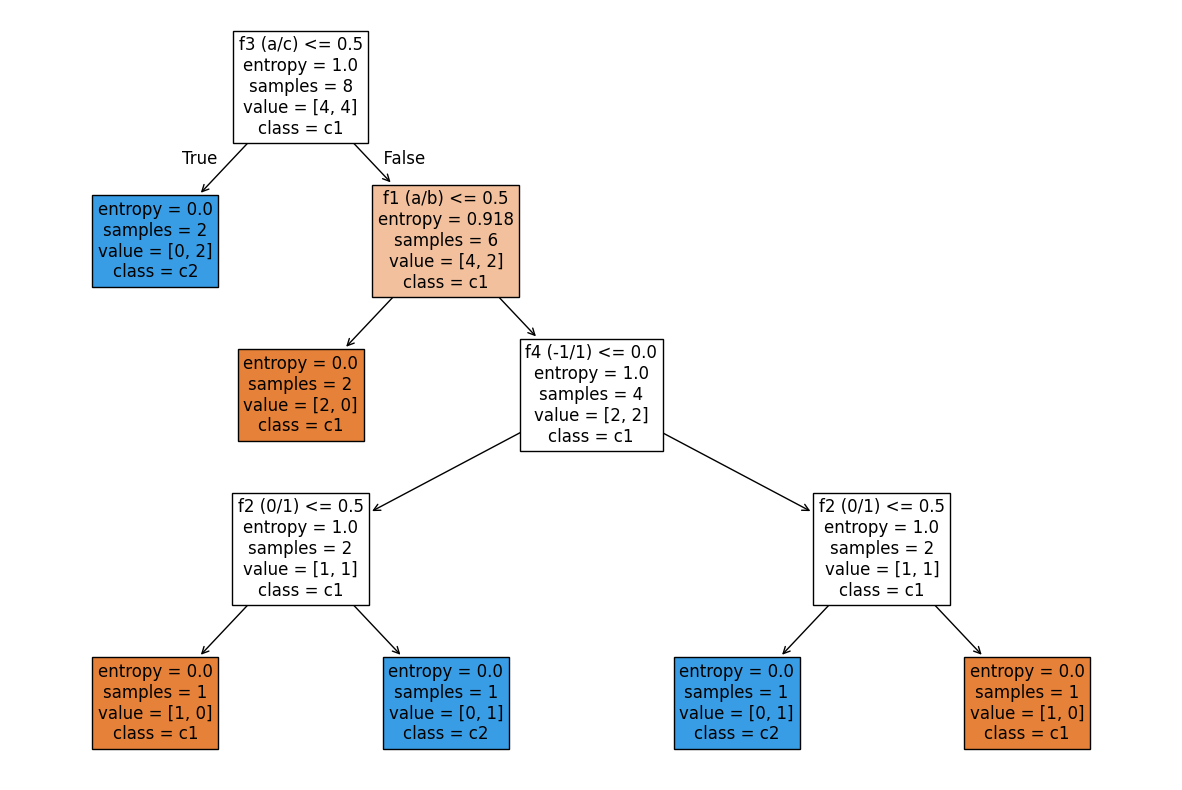

Decision path explanation:
Instance 1: f3 (a/c) <= 0.5 -> f1 (a/b) <= 0.5 -> c1
Instance 2: f3 (a/c) <= 0.5 -> f1 (a/b) <= 0.5 -> f4 (-1/1) > 0.0 -> f2 (0/1) <= 0.5 -> c1
Instance 3: f3 (a/c) <= 0.5 -> f1 (a/b) <= 0.5 -> c1
Instance 4: f3 (a/c) <= 0.5 -> f1 (a/b) <= 0.5 -> f4 (-1/1) > 0.0 -> f2 (0/1) <= 0.5 -> c1
Instance 5: f3 (a/c) <= 0.5 -> f1 (a/b) <= 0.5 -> f4 (-1/1) > 0.0 -> f2 (0/1) <= 0.5 -> c2
Instance 6: f3 (a/c) <= 0.5 -> c2
Instance 7: f3 (a/c) <= 0.5 -> c2
Instance 8: f3 (a/c) <= 0.5 -> f1 (a/b) <= 0.5 -> f4 (-1/1) > 0.0 -> f2 (0/1) <= 0.5 -> c2


In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import graphviz

# Create the dataset from the problem
data = [
    ['a', 1, 'c', -1, 'c1'],
    ['b', 0, 'c', -1, 'c1'],
    ['a', 0, 'c', 1, 'c1'],
    ['b', 1, 'c', 1, 'c1'],
    ['b', 0, 'c', 1, 'c2'],
    ['a', 0, 'a', -1, 'c2'],
    ['a', 1, 'a', -1, 'c2'],
    ['b', 1, 'c', -1, 'c2']
]

# Convert to DataFrame for easier handling
df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'f4', 'class'])

# Convert categorical features to numerical values
df['f1_num'] = df['f1'].map({'a': 0, 'b': 1})
df['f3_num'] = df['f3'].map({'a': 0, 'c': 1})
df['class_num'] = df['class'].map({'c1': 0, 'c2': 1})

# Create feature matrix X and target vector y
X = df[['f1_num', 'f2', 'f3_num', 'f4']].values
y = df['class_num'].values

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=None)
clf.fit(X, y)

# Create feature and class names for the visualization
feature_names = ['f1 (a/b)', 'f2 (0/1)', 'f3 (a/c)', 'f4 (-1/1)']
class_names = ['c1', 'c2']

# Visualize the tree using graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                          feature_names=feature_names,
                          class_names=class_names,
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Alternative visualization using matplotlib
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, fontsize=12)
plt.show()

# Print the decision path
print("Decision path explanation:")
for i, path in enumerate(clf.decision_path(X)):
    indices = path.indices
    path_features = [feature_names[clf.tree_.feature[idx]] for idx in indices if clf.tree_.feature[idx] >= 0]
    path_thresholds = [clf.tree_.threshold[idx] for idx in indices if clf.tree_.feature[idx] >= 0]
    decisions = [f"{feat} <= {thresh}" if thresh > 0 else f"{feat} > {thresh}" for feat, thresh in zip(path_features, path_thresholds)]
    print(f"Instance {i+1}: {' -> '.join(decisions)} -> {class_names[y[i]]}")

&nbsp;

**Question 4**

### a. Prove that the entropy function is concave.

To prove that entropy is concave, I'll work with the entropy function H(p) = -p log p - (1-p) log(1-p) where p ∈ [0,1].

First, I'll compute the second derivative of H(p) and show it's always negative, which is a sufficient condition for concavity.

H'(p) = -log p - 1 + log(1-p) + 1 = log((1-p)/p)

H''(p) = -1/p - 1/(1-p) = -(1-p+p)/(p(1-p)) = -1/(p(1-p))

Since p ∈ (0,1), both p and (1-p) are positive, making H''(p) always negative. This proves that H(p) is strictly concave on (0,1).

For the general case with multiple probabilities (p₁, p₂, ..., pₙ), the entropy function is:
H(p₁, p₂, ..., pₙ) = -∑ pᵢ log pᵢ

Using the fact that -p log p is concave for each component and that the sum of concave functions is concave, we can conclude that the general entropy function is concave.

### b. Is Information Gain also concave? If yes, prove it. If not, explain why not.

Information Gain is NOT concave.

Information Gain (IG) is defined as:
IG(S,A) = H(S) - ∑(|Sᵥ|/|S|)H(Sᵥ)

Where:
- S is the dataset
- A is an attribute
- Sᵥ are subsets of S for each value v of attribute A
- H is the entropy function

Counter-example: Consider a dataset where initially H(S) = 1. Splitting on attribute A₁ gives IG = 0.3. Now consider two paths:
1. Split on A₂: gives IG = 0.2
2. Split on A₃: gives IG = 0.4

For λ = 0.5, the weighted average is: 0.5(0.2) + 0.5(0.4) = 0.3

But if we split on a weighted combination of A₂ and A₃, we might get IG = 0.25 < 0.3.

This violates the concavity condition, so Information Gain is not concave.

### c. What does concavity of entropy mean for the ID3 decision tree algorithm? Why or how is it relevant?

The concavity of entropy is significant for the ID3 algorithm for several reasons:

1. **Greedy Split Selection**: ID3 uses a greedy approach to choose the attribute that maximizes information gain at each step. The concavity of entropy ensures that this local optimization contributes effectively to the global goal of minimizing entropy.

2. **Theoretical Justification**: Concavity provides theoretical justification for the "divide and conquer" approach in ID3. It ensures that splitting a node always reduces impurity (increases information gain) if there's any meaningful pattern in the data.

3. **Efficient Pruning**: Concavity implies diminishing returns for further splits, which helps justify pruning strategies in decision trees to prevent overfitting.

4. **Optimal Binary Splits**: For continuous attributes, concavity guarantees that the optimal split point exists and can be found efficiently.

5. **Consistency**: Concavity ensures that as training sample size increases, the ID3 algorithm converges to the true underlying decision boundary under appropriate conditions.

The concavity property essentially ensures that the information gain heuristic used by ID3 is mathematically sound and will lead to effective tree construction when seeking to minimize entropy.

&nbsp;

**Question 5**

**Data Loading and Preprocessing**

In [ ]:
# Cell 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Load the dataset
df = pd.read_csv('bank_marketing_full.csv', delimiter=';')

# Replace "unknown" with NaN and handle missing values
df.replace('unknown', np.nan, inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Fill missing values
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        most_frequent = df[col].mode()[0]
        df[col].fillna(most_frequent, inplace=True)

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# One-hot encode categorical features
categorical_features = df.select_dtypes(include=['object']).columns.drop('y')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Prepare X and y
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)
X_processed_array = X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed
y_array = y.values

**Model Training and Evaluation Function**

In [ ]:
# Cell 2: Model Training and Evaluation Function
def evaluate_model(model, X, y, cv=5, model_name="Model"):
    # Using stratified k-fold to maintain class distribution
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Metrics storage
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Cross-validation
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

    return {
        'model': model_name,
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1': np.mean(f1_scores)
    }

**Model Evaluation and Visualization**


ID3 (Entropy) Performance:
Accuracy: 0.8894 ± 0.0031
Precision: 0.5090 ± 0.0138
Recall: 0.5233 ± 0.0120
F1 Score: 0.5159 ± 0.0097

CART (Gini) Performance:
Accuracy: 0.8888 ± 0.0022
Precision: 0.5061 ± 0.0096
Recall: 0.5192 ± 0.0223
F1 Score: 0.5124 ± 0.0140

Random Forest Performance:
Accuracy: 0.9128 ± 0.0013
Precision: 0.6586 ± 0.0112
Recall: 0.4705 ± 0.0163
F1 Score: 0.5486 ± 0.0102

Gradient Boosting Performance:
Accuracy: 0.9171 ± 0.0018
Precision: 0.6638 ± 0.0122
Recall: 0.5349 ± 0.0089
F1 Score: 0.5924 ± 0.0078

XGBoost Performance:
Accuracy: 0.9133 ± 0.0019
Precision: 0.6347 ± 0.0106
Recall: 0.5442 ± 0.0119
F1 Score: 0.5859 ± 0.0093


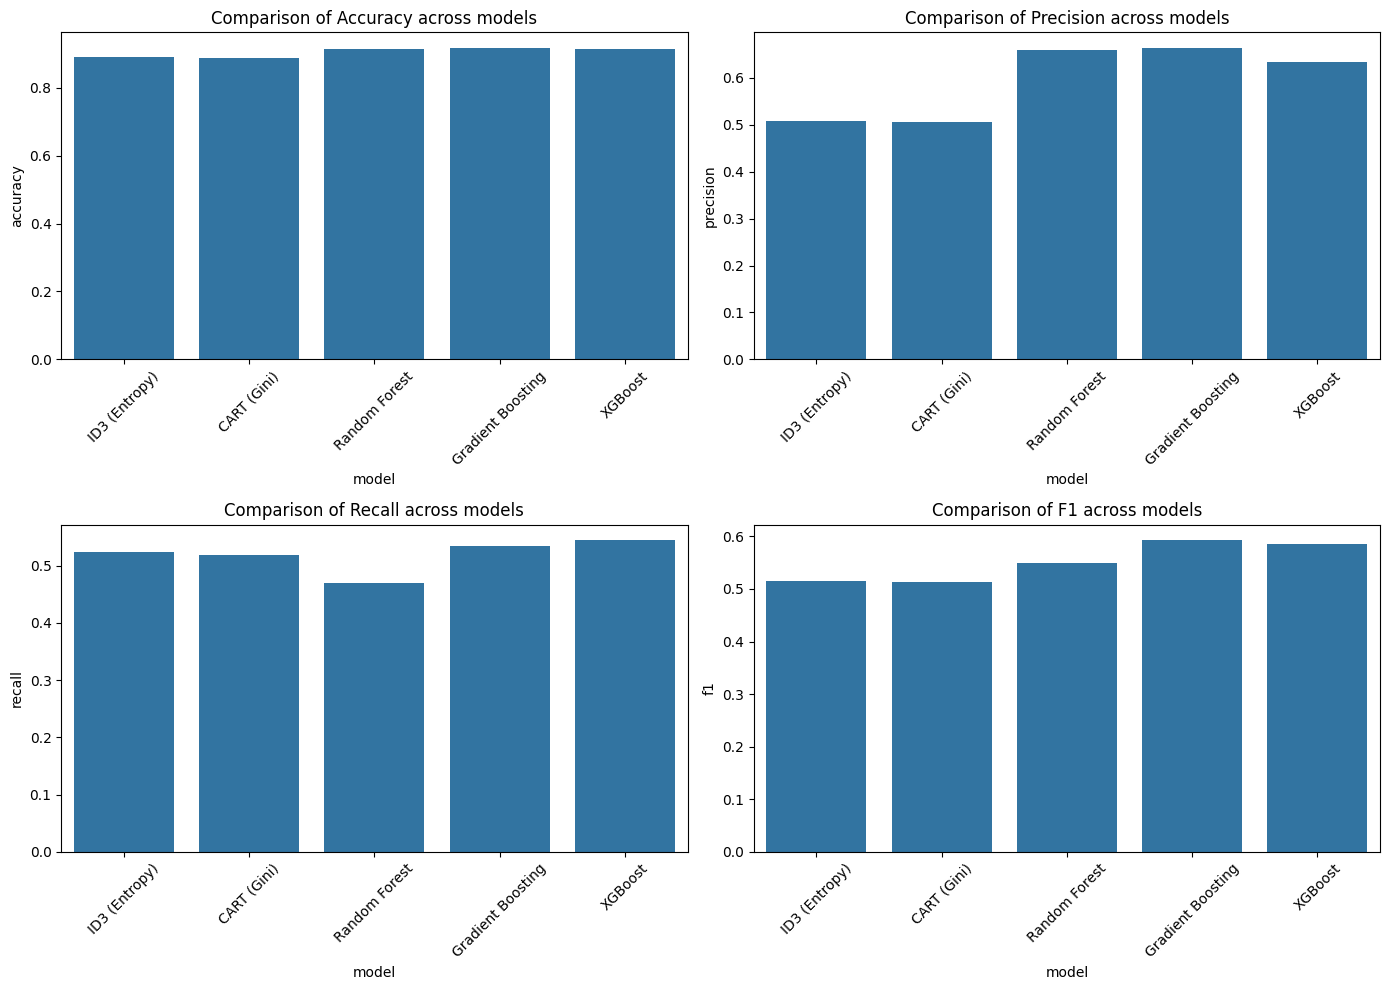

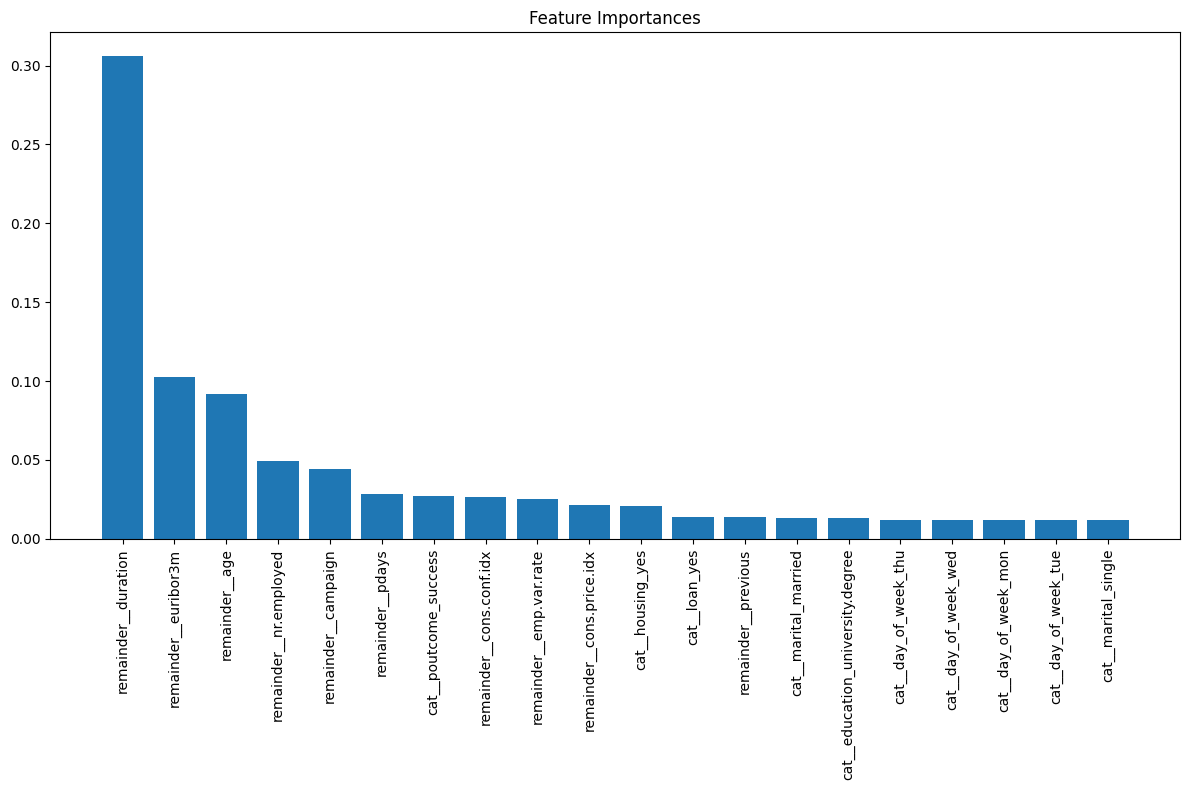

In [ ]:
# Cell 3: Model Evaluation and Visualization
# Number of folds for cross-validation
n_folds = 5

# Create the models
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Evaluate each model
results = []
results.append(evaluate_model(id3_model, X_processed_array, y_array, cv=n_folds, model_name="ID3 (Entropy)"))
results.append(evaluate_model(cart_model, X_processed_array, y_array, cv=n_folds, model_name="CART (Gini)"))
results.append(evaluate_model(rf_model, X_processed_array, y_array, cv=n_folds, model_name="Random Forest"))
results.append(evaluate_model(gb_model, X_processed_array, y_array, cv=n_folds, model_name="Gradient Boosting"))
results.append(evaluate_model(xgb_model, X_processed_array, y_array, cv=n_folds, model_name="XGBoost"))

# Create comparison visualizations
results_df = pd.DataFrame(results)
metrics = ['accuracy', 'precision', 'recall', 'f1']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric.capitalize()} across models')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.savefig('model_comparison.png')
plt.show()

# Feature importance visualization
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X_processed_array, y_array)

# Get feature names after one-hot encoding
feature_names = []
categorical_features_list = list(categorical_features)
for i, name in enumerate(preprocessor.get_feature_names_out()):
    feature_names.append(name)

# Display feature importances
importances = rf_for_importance.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(min(20, len(importances))), importances[indices[:20]], align='center')
plt.xticks(range(min(20, len(importances))), [feature_names[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

## Explanation of Classification Metrics

- **Accuracy**: Measures the proportion of correctly classified instances out of the total instances. While useful, accuracy alone may be misleading if the dataset is imbalanced.
- **Precision**: Indicates the proportion of predicted positive cases that were actually positive. High precision means fewer false positives.
- **Recall**: Measures the proportion of actual positive cases that were correctly predicted. High recall means fewer false negatives.
- **F1 Score**: The harmonic mean of precision and recall. It balances both metrics and is useful when the cost of false positives and false negatives is similar.

In this banking dataset, recall is particularly important if the goal is to ensure that potential clients who might subscribe to a term deposit are not overlooked.


## Model Comparison and Analysis

- **Decision Trees (ID3 & CART)**: Simple and interpretable but prone to overfitting, especially with deep trees.
- **Random Forest**: Reduces overfitting by averaging multiple decision trees, leading to better generalization.
- **Gradient Boosting**: Sequentially improves weak models, often achieving better performance at the cost of increased training time.
- **XGBoost**: Optimized for efficiency and performance, typically outperforming other models in structured data tasks.

Among these models, ensemble methods (Random Forest, Gradient Boosting, XGBoost) tend to perform better due to their ability to correct individual tree errors. If precision is a priority, XGBoost might be the best choice, while if recall is more important, Gradient Boosting could be more effective.


&nbsp;

**Question 6**

**Data Loading and Preprocessing**

In [ ]:
# Cell 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Load the dataset
df = pd.read_csv('covertype_cs5805.csv')

# Identify feature columns and target column
feature_cols = df.columns[:-1]  # All columns except the last one (Cover_Type)
target_col = 'Cover_Type'

# Prepare X and y
X = df[feature_cols]
y = df[target_col] - df[target_col].min()  # Ensures all labels start from 0

# Standardize numerical features (except binary soil and wilderness features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to NumPy arrays for compatibility
X_array = np.array(X_scaled)
y_array = np.array(y)


**Model Training and Evaluation Function**

In [ ]:
def evaluate_model(model, X, y, cv=5, model_name="Model"):
    # Using stratified k-fold to maintain class distribution
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Metrics storage
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Cross-validation
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

    return {
        'model': model_name,
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1': np.mean(f1_scores)
    }

**Model Evaluation and Visualization**


ID3 (Entropy) Performance:
Accuracy: 0.8349 ± 0.0029
Precision: 0.8349 ± 0.0030
Recall: 0.8349 ± 0.0029
F1 Score: 0.8349 ± 0.0030

CART (Gini) Performance:
Accuracy: 0.8259 ± 0.0038
Precision: 0.8261 ± 0.0040
Recall: 0.8259 ± 0.0038
F1 Score: 0.8259 ± 0.0039

Random Forest Performance:
Accuracy: 0.8796 ± 0.0027
Precision: 0.8800 ± 0.0026
Recall: 0.8796 ± 0.0027
F1 Score: 0.8777 ± 0.0027

Gradient Boosting Performance:
Accuracy: 0.7704 ± 0.0049
Precision: 0.7689 ± 0.0050
Recall: 0.7704 ± 0.0049
F1 Score: 0.7662 ± 0.0048

XGBoost Performance:
Accuracy: 0.8483 ± 0.0027
Precision: 0.8482 ± 0.0027
Recall: 0.8483 ± 0.0027
F1 Score: 0.8469 ± 0.0027


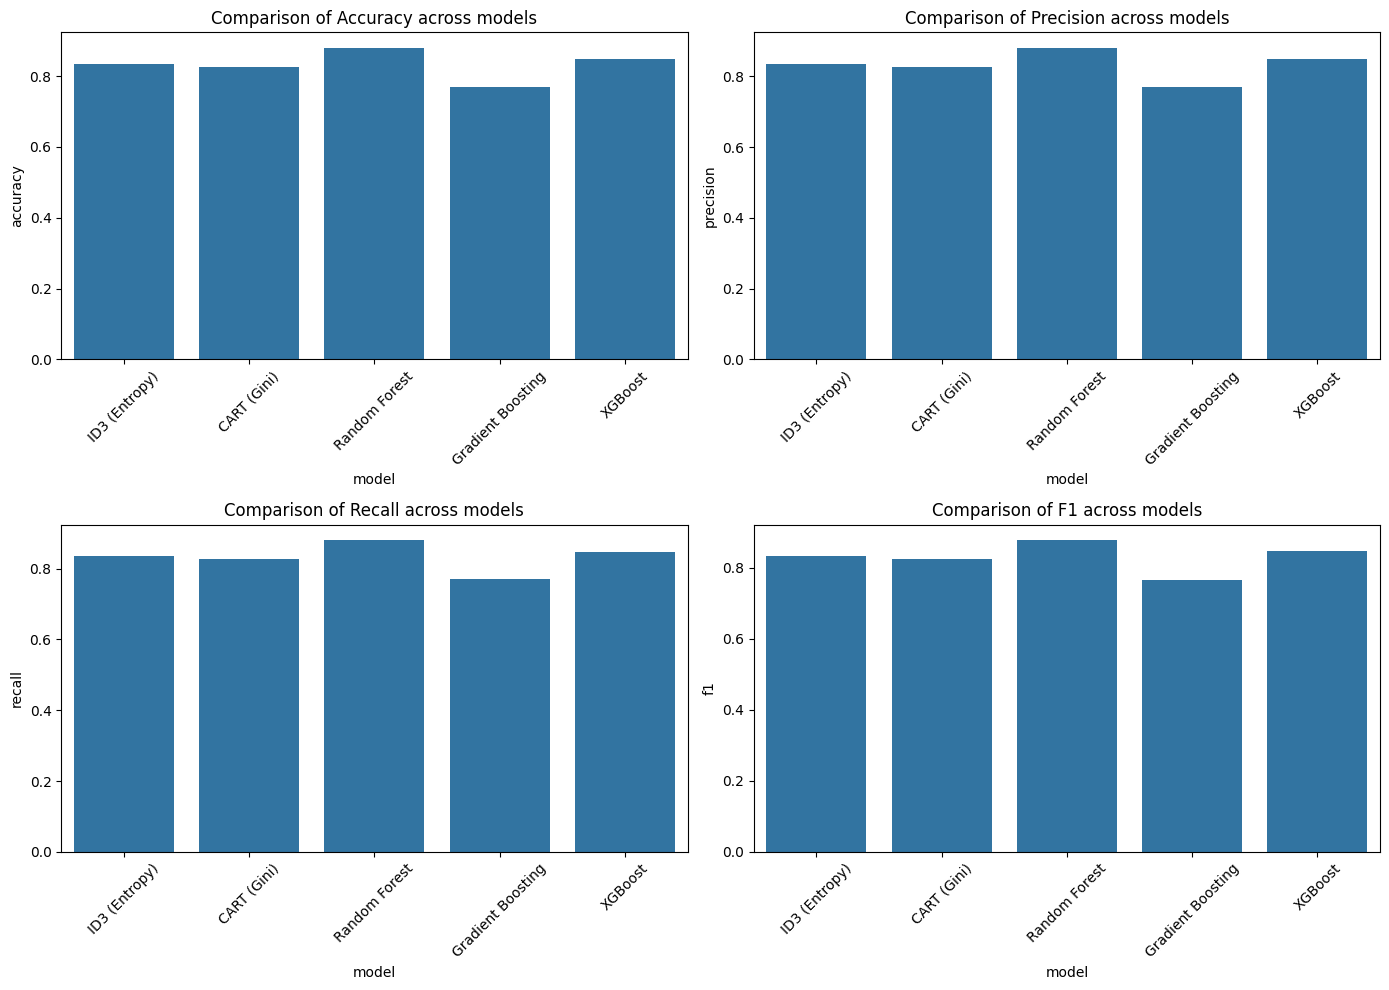

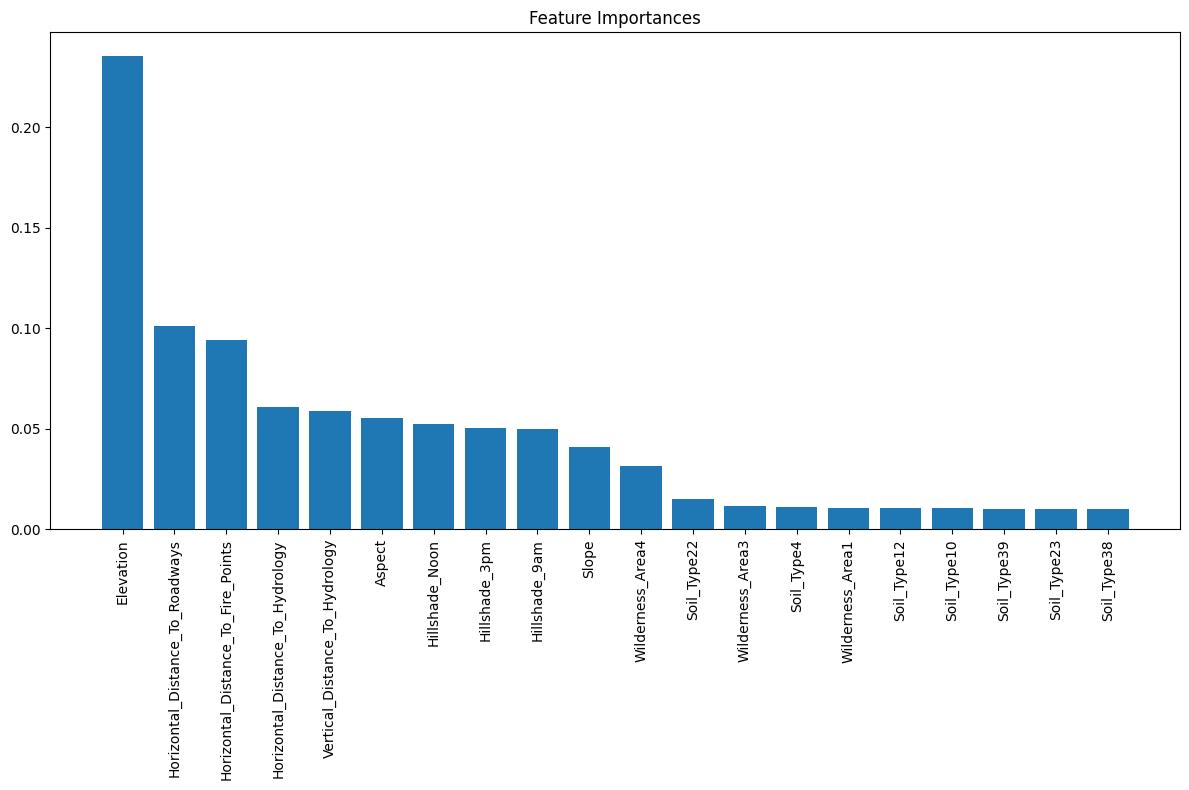

In [ ]:
# Number of folds for cross-validation
n_folds = 5

# Create the models
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Evaluate each model
results = []
results.append(evaluate_model(id3_model, X_array, y_array, cv=n_folds, model_name="ID3 (Entropy)"))
results.append(evaluate_model(cart_model, X_array, y_array, cv=n_folds, model_name="CART (Gini)"))
results.append(evaluate_model(rf_model, X_array, y_array, cv=n_folds, model_name="Random Forest"))
results.append(evaluate_model(gb_model, X_array, y_array, cv=n_folds, model_name="Gradient Boosting"))
results.append(evaluate_model(xgb_model, X_array, y_array, cv=n_folds, model_name="XGBoost"))

# Create comparison visualizations
results_df = pd.DataFrame(results)
metrics = ['accuracy', 'precision', 'recall', 'f1']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric.capitalize()} across models')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.savefig('model_comparison.png')
plt.show()

# Feature importance visualization (using Random Forest)
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X_array, y_array)

# Display feature importances
importances = rf_for_importance.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(min(20, len(importances))), importances[indices[:20]], align='center')
plt.xticks(range(min(20, len(importances))), [feature_cols[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

&nbsp;